In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image_dir = '/Users/zuzannaszubartowska/code/zuzannaszu/chess_hacker/data/photos'
label_dir = '/Users/zuzannaszubartowska/code/zuzannaszu/chess_hacker/data/labels'

In [3]:
image_filenames = os.listdir(image_dir)

In [4]:
label_filenames = os.listdir(label_dir)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, label_filenames))

ValueError: Dimensions 1943 and 1945 are not compatible

In [15]:
image_path = '/Users/zuzannaszubartowska/code/zuzannaszu/chess_hacker/data/photos/15.jpg'

In [ ]:
image = Image.open(image_path)

image_array = np.array(image)

plt.imshow(image_array)
plt.show()

In [17]:
img = cv2.imread('/Users/zuzannaszubartowska/code/zuzannaszu/chess_hacker/data/photos/0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# binarize the image
ret, bw = cv2.threshold(gray, 240, 255, 
cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

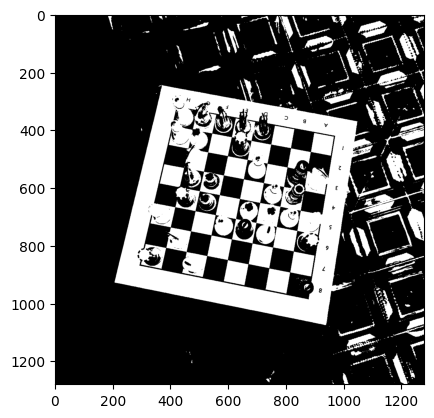

In [18]:
plt.imshow(bw, cmap='gray')

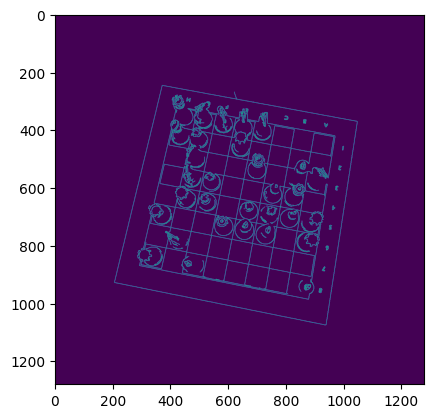

In [19]:
edges = cv2.Canny(img, 100,250)
plt.imshow(edges)

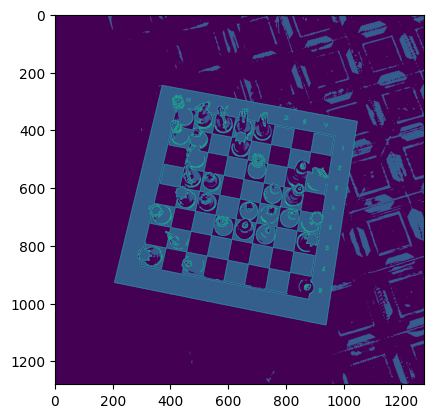

In [20]:
added_image = cv2.addWeighted(bw,0.3,edges,1,0)
plt.imshow(added_image)

In [21]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 3)

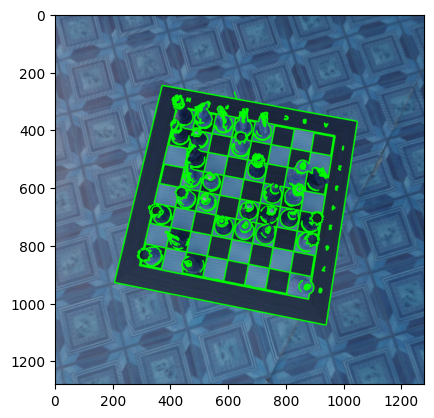

In [22]:
plt.imshow(image_with_contours)

In [28]:
thresh = cv2.threshold(bw, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)